In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
import os
os.chdir('C:/Users/dzfal')

In [7]:
df = pd.read_csv('OneDrive/Desktop/2023spring/DMP/A3/Assignment_3_23-1/Assignment_3/Loan_Prediction/Data for Cleaning & Modeling.csv')

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

In [9]:
nulls = df.isna().sum()
null_percent = nulls[nulls>0] / len(df)
null_percent.to_frame('% Null').style.background_gradient(cmap='Reds')

,% Null
X1,0.152525
X2,0.000003
X3,0.000003
X4,0.000003
X5,0.000003
X6,0.000003
X7,0.000003
X8,0.153175
X9,0.153175
X10,0.059965


**Drop the columns with large nan values**

In [10]:
df = df.drop(['X16','X25','X26'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X17     399999 non-null  object 
 16  X18     399981 non-null  object 
 17  X19     399999 non-null  object 
 18  X20     399999 non-null  object 
 19  X21     399999 non-null  float64
 20  X22     399999 non-null  float64
 21  X23     39

In [11]:
df1 = df.dropna(subset=['X1'])
df1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X21,X22,X23,X24,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f


In [12]:
df1['X4'] = df1['X4'].apply(lambda x: str(x).replace(',','').replace('$', '')).astype(float)
df1['X5'] = df1['X5'].apply(lambda x: str(x).replace(',','').replace('$', '')).astype(float)
df1['X6'] = df1['X6'].apply(lambda x: str(x).replace(',','').replace('$', '')).astype(float)

In [13]:
df1['X30'] = df1['X30'].apply(lambda x: str(x).replace('%','')).astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      338989 non-null  float64
 2   X3      338989 non-null  float64
 3   X4      338989 non-null  float64
 4   X5      338989 non-null  float64
 5   X6      338989 non-null  float64
 6   X7      338989 non-null  object 
 7   X8      287123 non-null  object 
 8   X9      287123 non-null  object 
 9   X10     318733 non-null  object 
 10  X11     324195 non-null  object 
 11  X12     287030 non-null  object 
 12  X13     287238 non-null  float64
 13  X14     338989 non-null  object 
 14  X15     338989 non-null  object 
 15  X17     338989 non-null  object 
 16  X18     338973 non-null  object 
 17  X19     338989 non-null  object 
 18  X20     338989 non-null  object 
 19  X21     338989 non-null  float64
 20  X22     338989 non-null  float64
 21  X23     33

In [14]:
columns = ['X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X14', 'X15', 'X17', 'X18', 'X19', 'X23', 'X32']
for column in columns:
    print("The ", column, " has \n", df1[column].value_counts())

The  X7  has 
  36 months    247791
 60 months     91198
Name: X7, dtype: int64
The  X8  has 
 B    86121
C    76446
D    46984
A    45525
E    21628
F     8395
G     2024
Name: X8, dtype: int64
The  X9  has 
 B3    20352
B4    19137
B2    16767
C1    16342
C2    16310
B5    15521
C3    15425
C4    14646
B1    14344
C5    13723
A5    13086
A4    11806
D1    11720
D2    10498
D3     9091
D4     8573
A3     7653
D5     7102
A2     6496
A1     6484
E1     5447
E2     5246
E3     4230
E4     3640
E5     3065
F1     2490
F2     1873
F3     1712
F4     1331
F5      989
G1      677
G2      511
G3      378
G4      252
G5      206
Name: X9, dtype: int64
The  X10  has 
 Teacher                           3602
Manager                           2875
Registered Nurse                  1537
RN                                1452
Supervisor                        1286
                                  ... 
KeyBank                              1
CITY OF CINCINNATI                   1
Creative Granite & 

**Drop the columns with too many types of values for categorical variables.**

In [15]:
df1 = df1.drop(columns=['X9', 'X10', 'X15', 'X18', 'X19', 'X23'])

In [16]:
df1['X1'] = df1['X1'].apply(lambda x: x.replace('%','')).astype(float)/100
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X2      338989 non-null  float64
 2   X3      338989 non-null  float64
 3   X4      338989 non-null  float64
 4   X5      338989 non-null  float64
 5   X6      338989 non-null  float64
 6   X7      338989 non-null  object 
 7   X8      287123 non-null  object 
 8   X11     324195 non-null  object 
 9   X12     287030 non-null  object 
 10  X13     287238 non-null  float64
 11  X14     338989 non-null  object 
 12  X17     338989 non-null  object 
 13  X20     338989 non-null  object 
 14  X21     338989 non-null  float64
 15  X22     338989 non-null  float64
 16  X24     338989 non-null  float64
 17  X27     338989 non-null  float64
 18  X28     338989 non-null  float64
 19  X29     338989 non-null  float64
 20  X30     338765 non-null  float64
 21  X31     33

In [17]:
df1['4&5'] = df1.apply(lambda x : x['X4']/x['X5'] ,axis = 1)
df1 = df1.drop(columns=['X4', 'X5'])
df1.head()

,X1,X2,X3,X6,X7,X8,X11,X12,X13,X14,...,X21,X22,X24,X27,X28,X29,X30,X31,X32,4&5
0,0.1189,54734.0,80364.0,19080.0,36 months,B,< 1 year,RENT,85000.0,VERIFIED - income,...,19.48,0.0,0.0,10.0,0.0,28854.0,52.1,42.0,f,1.0
1,0.1071,55742.0,114426.0,673.0,36 months,B,< 1 year,RENT,65000.0,not verified,...,14.29,0.0,0.0,7.0,0.0,33623.0,76.7,7.0,f,1.0
2,0.1699,57167.0,137225.0,24725.0,36 months,D,1 year,RENT,70000.0,VERIFIED - income,...,10.50,0.0,0.0,10.0,0.0,19878.0,66.3,17.0,f,1.0
3,0.1311,57245.0,138150.0,1200.0,36 months,C,10+ years,OWN,54000.0,not verified,...,5.47,0.0,0.0,5.0,0.0,2584.0,40.4,31.0,f,1.0
4,0.1357,57416.0,139635.0,10692.0,36 months,C,6 years,RENT,32000.0,not verified,...,11.63,0.0,1.0,14.0,0.0,3511.0,25.6,40.0,f,1.0


In [18]:
df1 = df1.dropna(subset=['X8'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287123 entries, 0 to 399999
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      287123 non-null  float64
 1   X2      287123 non-null  float64
 2   X3      287123 non-null  float64
 3   X6      287123 non-null  float64
 4   X7      287123 non-null  object 
 5   X8      287123 non-null  object 
 6   X11     274672 non-null  object 
 7   X12     242995 non-null  object 
 8   X13     243133 non-null  float64
 9   X14     287123 non-null  object 
 10  X17     287123 non-null  object 
 11  X20     287123 non-null  object 
 12  X21     287123 non-null  float64
 13  X22     287123 non-null  float64
 14  X24     287123 non-null  float64
 15  X27     287123 non-null  float64
 16  X28     287123 non-null  float64
 17  X29     287123 non-null  float64
 18  X30     286945 non-null  float64
 19  X31     287123 non-null  float64
 20  X32     287123 non-null  object 
 21  4&5     28

**For the accuracy, we drop the NaN rows based on the columns having least non-null values, and then impute**

In [19]:
df1 = df1.dropna(subset=['X8'])

**We can impute the data now**

In [20]:
from sklearn.impute import SimpleImputer

In [21]:
#Impute categorical data
imp = SimpleImputer(strategy="most_frequent")

In [22]:
c = ['X11', 'X12']
df1[c] = imp.fit_transform(df1[c])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287123 entries, 0 to 399999
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      287123 non-null  float64
 1   X2      287123 non-null  float64
 2   X3      287123 non-null  float64
 3   X6      287123 non-null  float64
 4   X7      287123 non-null  object 
 5   X8      287123 non-null  object 
 6   X11     287123 non-null  object 
 7   X12     287123 non-null  object 
 8   X13     243133 non-null  float64
 9   X14     287123 non-null  object 
 10  X17     287123 non-null  object 
 11  X20     287123 non-null  object 
 12  X21     287123 non-null  float64
 13  X22     287123 non-null  float64
 14  X24     287123 non-null  float64
 15  X27     287123 non-null  float64
 16  X28     287123 non-null  float64
 17  X29     287123 non-null  float64
 18  X30     286945 non-null  float64
 19  X31     287123 non-null  float64
 20  X32     287123 non-null  object 
 21  4&5     28

<AxesSubplot:xlabel='X13', ylabel='Density'>

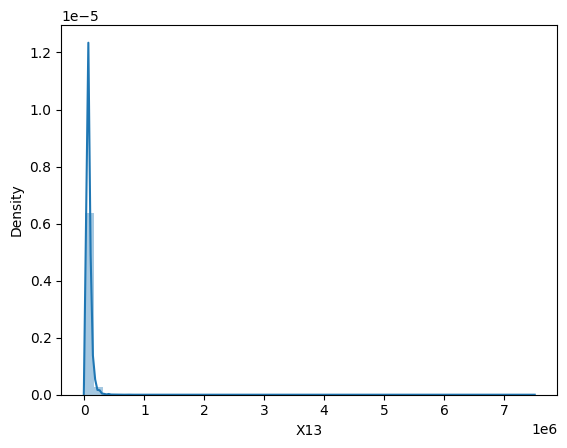

In [23]:
#Impute the numeric variables
sns.distplot(df1[df1['X13'].notnull()]['X13'])

<AxesSubplot:xlabel='X30', ylabel='Density'>

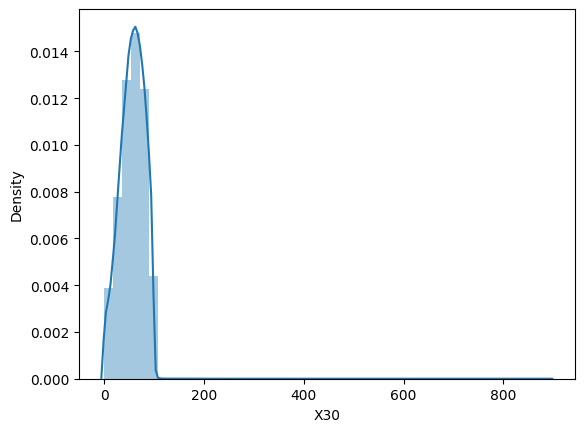

In [24]:
sns.distplot(df1[df1['X30'].notnull()]['X30'])

**From these two plots, we can see the X13 is highly skewed, and X30 is relatively symmetric. So we can impute the X13 with median and X30 with mean.**

In [28]:
c = ['X13']
d = ['X30']
df1[c] = imp.fit_transform(df1[c])

imp_mean = SimpleImputer(strategy="mean")
df1[d] = imp_mean.fit_transform(df1[d])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287123 entries, 0 to 399999
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      287123 non-null  float64
 1   X2      287123 non-null  float64
 2   X3      287123 non-null  float64
 3   X6      287123 non-null  float64
 4   X7      287123 non-null  object 
 5   X8      287123 non-null  object 
 6   X11     287123 non-null  object 
 7   X12     287123 non-null  object 
 8   X13     287123 non-null  float64
 9   X14     287123 non-null  object 
 10  X17     287123 non-null  object 
 11  X20     287123 non-null  object 
 12  X21     287123 non-null  float64
 13  X22     287123 non-null  float64
 14  X24     287123 non-null  float64
 15  X27     287123 non-null  float64
 16  X28     287123 non-null  float64
 17  X29     287123 non-null  float64
 18  X30     287123 non-null  float64
 19  X31     287123 non-null  float64
 20  X32     287123 non-null  object 
 21  4&5     28

**Create dummy variables**

In [29]:
c = ['X7', 'X8', 'X11', 'X12', 'X14', 'X17', 'X20', 'X32']
df1 = pd.get_dummies(df1, columns=c)
df1.head()

,X1,X2,X3,X6,X13,X21,X22,X24,X27,X28,...,X20_TX,X20_UT,X20_VA,X20_VT,X20_WA,X20_WI,X20_WV,X20_WY,X32_f,X32_w
0,0.1189,54734.0,80364.0,19080.0,85000.0,19.48,0.0,0.0,10.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.1071,55742.0,114426.0,673.0,65000.0,14.29,0.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.1699,57167.0,137225.0,24725.0,70000.0,10.50,0.0,0.0,10.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.1311,57245.0,138150.0,1200.0,54000.0,5.47,0.0,0.0,5.0,0.0,...,1,0,0,0,0,0,0,0,1,0
4,0.1357,57416.0,139635.0,10692.0,32000.0,11.63,0.0,1.0,14.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
y = df1['X1']
X = df1.drop(columns=['X1'])

In [31]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,train_size = 0.8, test_size = 0.2)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
# LinearRegression
clf = LinearRegression()
clf.fit(train_x,train_y)
acc_lr = clf.score(test_x,test_y)

In [34]:
acc_lr

0.9260353218321047

In [35]:
from sklearn.metrics import mean_squared_error
import math

In [36]:
y_pred = clf.predict(test_x)
MSE = mean_squared_error(test_y, y_pred)
RMSE = math.sqrt(MSE)
RMSE

0.011907309226385932

In [37]:
dt = pd.read_csv('OneDrive/Desktop/2023spring/DMP/A3/Assignment_3_23-1/Assignment_3/Loan_Prediction/Holdout for Testing.csv')

dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  object 
 4   X5      80000 non-null  object 
 5   X6      80000 non-null  object 
 6   X7      80000 non-null  object 
 7   X8      80000 non-null  object 
 8   X9      80000 non-null  object 
 9   X10     75606 non-null  object 
 10  X11     75618 non-null  object 
 11  X12     80000 non-null  object 
 12  X13     80000 non-null  float64
 13  X14     80000 non-null  object 
 14  X15     80000 non-null  object 
 15  X16     15 non-null     object 
 16  X17     80000 non-null  object 
 17  X18     80000 non-null  object 
 18  X19     80000 non-null  object 
 19  X20     80000 non-null  object 
 20  X21     80000 non-null  float64
 21  X22     80000 non-null  int64  
 22

In [38]:
dt = dt.drop(['X16','X25','X26'], axis = 1)
dt['X4'] = dt['X4'].apply(lambda x: str(x).replace(',','').replace('$', '')).astype(float)
dt['X5'] = dt['X5'].apply(lambda x: str(x).replace(',','').replace('$', '')).astype(float)
dt['X6'] = dt['X6'].apply(lambda x: str(x).replace(',','').replace('$', '')).astype(float)
dt['X30'] = dt['X30'].apply(lambda x: str(x).replace('%','')).astype(float)
dt = dt.drop(columns=['X9', 'X10', 'X15', 'X18', 'X19', 'X23'])
dt['x4&5'] = dt.apply(lambda x : x['X4']/x['X5'] ,axis = 1)
dt = dt.drop(columns=['X4', 'X5'])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X6      80000 non-null  float64
 4   X7      80000 non-null  object 
 5   X8      80000 non-null  object 
 6   X11     75618 non-null  object 
 7   X12     80000 non-null  object 
 8   X13     80000 non-null  float64
 9   X14     80000 non-null  object 
 10  X17     80000 non-null  object 
 11  X20     80000 non-null  object 
 12  X21     80000 non-null  float64
 13  X22     80000 non-null  int64  
 14  X24     80000 non-null  int64  
 15  X27     80000 non-null  int64  
 16  X28     80000 non-null  int64  
 17  X29     80000 non-null  int64  
 18  X30     79970 non-null  float64
 19  X31     80000 non-null  int64  
 20  X32     80000 non-null  object 
 21  x4&5    80000 non-null  float64
dty

In [39]:
#Impute categorical data
imp = SimpleImputer(strategy="most_frequent")
c = ['X11']
dt[c] = imp.fit_transform(dt[c])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X6      80000 non-null  float64
 4   X7      80000 non-null  object 
 5   X8      80000 non-null  object 
 6   X11     80000 non-null  object 
 7   X12     80000 non-null  object 
 8   X13     80000 non-null  float64
 9   X14     80000 non-null  object 
 10  X17     80000 non-null  object 
 11  X20     80000 non-null  object 
 12  X21     80000 non-null  float64
 13  X22     80000 non-null  int64  
 14  X24     80000 non-null  int64  
 15  X27     80000 non-null  int64  
 16  X28     80000 non-null  int64  
 17  X29     80000 non-null  int64  
 18  X30     79970 non-null  float64
 19  X31     80000 non-null  int64  
 20  X32     80000 non-null  object 
 21  x4&5    80000 non-null  float64
dty

In [41]:
d = ['X30']
imp_mean = SimpleImputer(strategy="mean")
dt[d] = imp_mean.fit_transform(dt[d])

In [42]:
c = ['X7', 'X8', 'X11', 'X12', 'X14', 'X17', 'X20', 'X32']
dt = pd.get_dummies(dt, columns=c)
dt.head()

,X1,X2,X3,X6,X13,X21,X22,X24,X27,X28,...,X20_TX,X20_UT,X20_VA,X20_VT,X20_WA,X20_WI,X20_WV,X20_WY,X32_f,X32_w
0,NaN,44409194,47416907,6000.0,68000.0,28.31,0,1,18,0,...,0,0,0,0,0,0,0,0,1,0
1,NaN,44017917,47034722,24000.0,110480.0,16.03,0,1,12,0,...,0,0,0,0,0,0,0,0,0,1
2,NaN,44259158,47306871,35000.0,86000.0,32.49,0,0,16,0,...,0,0,0,0,0,0,0,0,0,1
3,NaN,44429213,47476932,10000.0,30000.0,32.96,0,1,13,1,...,0,0,0,0,0,0,0,0,0,1
4,NaN,44299188,47346901,24000.0,82500.0,31.03,0,0,27,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
c = set(train_x.columns) - set(dt.columns)
c.remove('4&5')
for value in c:
    dt[value] = 0
    
dt.columns

Index(['X1', 'X2', 'X3', 'X6', 'X13', 'X21', 'X22', 'X24', 'X27', 'X28',
       ...
       'X32_f', 'X32_w', 'X17_educational', 'X12_ANY', 'X12_NONE', 'X20_IA',
       'X20_NE', 'X12_OTHER', 'X20_ME', 'X20_ID'],
      dtype='object', length=109)

In [44]:
X_t = dt.drop(columns=['X1'])
X_t

,X2,X3,X6,X13,X21,X22,X24,X27,X28,X29,...,X32_f,X32_w,X17_educational,X12_ANY,X12_NONE,X20_IA,X20_NE,X12_OTHER,X20_ME,X20_ID
0,44409194,47416907,6000.0,68000.0,28.31,0,1,18,0,19861,...,1,0,0,0,0,0,0,0,0,0
1,44017917,47034722,24000.0,110480.0,16.03,0,1,12,0,17001,...,0,1,0,0,0,0,0,0,0,0
2,44259158,47306871,35000.0,86000.0,32.49,0,0,16,0,25797,...,0,1,0,0,0,0,0,0,0,0
3,44429213,47476932,10000.0,30000.0,32.96,0,1,13,1,9586,...,0,1,0,0,0,0,0,0,0,0
4,44299188,47346901,24000.0,82500.0,31.03,0,0,27,0,31842,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,38272852,41056632,6400.0,50000.0,15.74,0,0,13,0,7185,...,1,0,0,0,0,0,0,0,0,0
79996,38232598,41016384,30000.0,92000.0,19.28,0,0,19,0,25151,...,1,0,0,0,0,0,0,0,0,0
79997,38282597,41066378,17600.0,70000.0,17.50,0,0,18,0,12161,...,1,0,0,0,0,0,0,0,0,0
79998,38232613,41016400,2500.0,80000.0,16.52,0,0,13,0,13031,...,1,0,0,0,0,0,0,0,0,0


In [45]:
pred_y_test = clf.predict(X_t)
predictresult=pd.DataFrame({
    'Survived': pred_y_test
})
predictresult.to_csv('OneDrive/Desktop/2023spring/DMP/A3/Assignment_3_23-1/Assignment_3/Loan_Prediction/Loan Result from Zhuofan Dong 12372250.csv',index=False)

## Write-up

**I personally think the most important part is hwo to handle the data when we are doing modeling. In this case, I think the pros includes that I drop the columns that have null values the most. In some extent, it can make the data to have less null values, but make us lose some information as well. For the predictions, the model I use is the regression because it is the most represenative model for predictions. It is efficient to have the result, but we still have to plot the performance of training set and test set to see if there is any overfitting. And it is sparse data, we can also use Lasso to regularized the features.**